In [1]:
# import tools and libraries
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing



In [2]:
boston_df = pd.read_csv('../dmba/BostonHousing.csv')

In [3]:
boston_df.shape

(506, 14)

In [4]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0,0


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


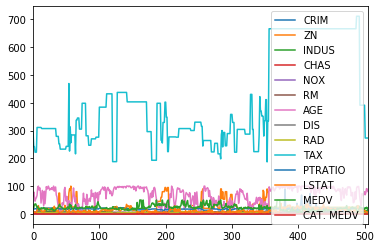

In [6]:
boston_df.plot()

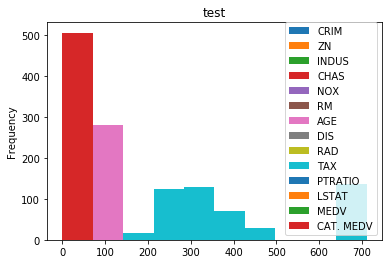

In [7]:
boston_df.plot(kind="hist", title="test")

In [9]:
boston_df['CRIM'].head()

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: CRIM, dtype: float64

In [10]:
boston_df[['CRIM','ZN']]

,CRIM,ZN
0,0.00632,18.0
1,0.02731,0.0
2,0.02729,0.0
3,0.03237,0.0
4,0.06905,0.0
5,0.02985,0.0
6,0.08829,12.5
7,0.14455,12.5
8,0.21124,12.5
9,0.17004,12.5


In [11]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0,0


In [12]:
# fiomd rows based on col value
boston_zn = boston_df[boston_df['ZN'] == 18.0]


In [13]:
boston_zn

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0,0


In [14]:
boston_df['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [17]:
boston_df['ZN'] is in("18.0", "12.5")

SyntaxError: invalid syntax (<ipython-input-17-de97042c553c>, line 1)

In [19]:
boston_df['ZN'].mean()

11.363636363636363

In [20]:
boston_df.apply(np.mean, axis=0)

CRIM           3.613524
ZN            11.363636
INDUS         11.136779
CHAS           0.069170
NOX            0.554695
RM             6.284634
AGE           68.574901
DIS            3.795043
RAD            9.549407
TAX          408.237154
PTRATIO       18.455534
LSTAT         12.653063
MEDV          22.532806
CAT. MEDV      0.166008
dtype: float64

In [21]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0,0


In [22]:
boston_df['CRIM'].mean()

3.6135235573122535

In [25]:
boston_df.apply(np.std)

CRIM           8.593041
ZN            23.299396
INDUS          6.853571
CHAS           0.253743
NOX            0.115763
RM             0.701923
AGE           28.121033
DIS            2.103628
RAD            8.698651
TAX          168.370495
PTRATIO        2.162805
LSTAT          7.134002
MEDV           9.188012
CAT. MEDV      0.372088
dtype: float64